In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
games_df = pd.read_csv('../phase1/merg/merged_games.csv')
players_df = pd.read_csv('../phase1/merg/new_merged_players_unique.csv')
player_goals_df = pd.read_csv('../phase1/merg/merged_player_goals.csv')

In [12]:
player_goals_merged_df = pd.merge(player_goals_df, players_df, on='player_id')
player_goals_merged_df = pd.merge(player_goals_merged_df, games_df, on='game_id')

player_goals_merged_df = player_goals_merged_df.fillna(value=0)
player_goals_merged_df.loc[player_goals_merged_df['league_name'] == 'UEFA Champions League', 'matchday'] = player_goals_merged_df['matchday'] = 0

player_goals_merged_df['matchday'] = player_goals_merged_df['matchday'].astype(int)

In [13]:
player_goals_merged_df['matchday'] = player_goals_merged_df['matchday'].astype(int)
player_goals_merged_df['year'] = pd.DatetimeIndex(player_goals_merged_df['date']).year
player_goals_merged_df = player_goals_merged_df[(player_goals_merged_df['year'] >= 2017) & (player_goals_merged_df['year'] <= 2021)]
player_goals_season_df = player_goals_merged_df.groupby(['player_id', 'year']).agg({'goals': 'sum'}).reset_index()
player_info_df = players_df[['player_id', 'birthdate', 'height', 'main_position', 'national_team', 'foot']]
player_goals_season_df = pd.merge(player_goals_season_df, player_info_df, on='player_id')


In [14]:
experienced_players_season_df = player_goals_season_df[player_goals_season_df['birthdate'].apply(lambda x: pd.Timestamp('now').year - pd.to_datetime(x).year) >= 30]
inexperienced_players_season_df = player_goals_season_df[player_goals_season_df['birthdate'].apply(lambda x: pd.Timestamp('now').year - pd.to_datetime(x).year) < 30]
experienced_players_mean_goals = experienced_players_season_df.groupby('year').agg({'goals': 'mean'})
inexperienced_players_mean_goals = inexperienced_players_season_df.groupby('year').agg({'goals': 'mean'})

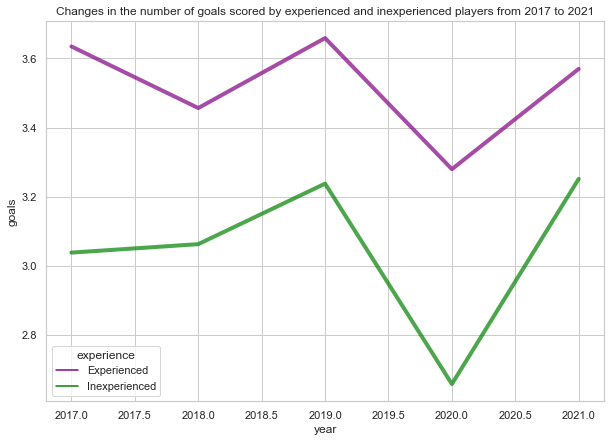

In [15]:
combined_df = pd.concat([experienced_players_mean_goals.assign(experience='Experienced'), inexperienced_players_mean_goals.assign(experience='Inexperienced')]).reset_index()
combined_df = combined_df.interpolate(method='linear')

sns.set(rc={'figure.figsize':(10, 7)})
sns.set_style("whitegrid")
sns.lineplot(x='year', y='goals', hue='experience', data=combined_df, palette={'Experienced': 'purple', 'Inexperienced': 'green'}, linewidth=4, alpha=0.7)

plt.title('Changes in the number of goals scored by experienced and inexperienced players from 2017 to 2021')
plt.show()

In [7]:
ucl_teams_data = pd.read_csv('../phase1/crawlers/ULC_teams_2021.csv')
team_data = pd.read_csv('../phase1/crawlers/team_data.csv')

In [8]:
ucl_teams = ucl_teams_data['team_id'].unique()
ucl_team_data = team_data[team_data['team_id'].isin(ucl_teams)]
ucl_avg_points = ucl_team_data[ucl_team_data['year'] == 2021]['points'].mean()
other_teams = team_data[team_data['team_id'].isin(ucl_teams) == False]
other_avg_points = other_teams[other_teams['year'] == 2021]['points'].mean()

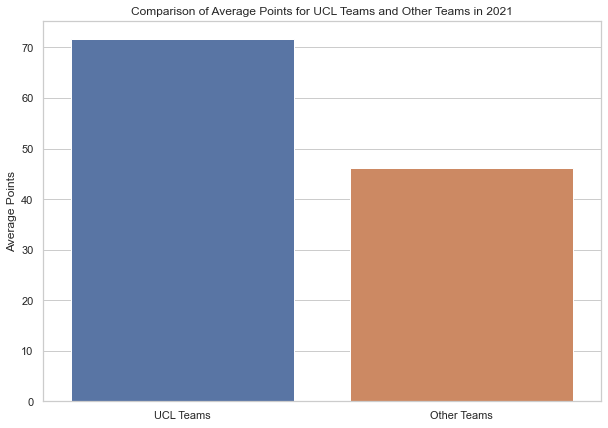

In [9]:
data = pd.DataFrame({'League': ['UCL Teams', 'Other Teams'], 'Average Points': [ucl_avg_points, other_avg_points]})
sns.barplot(x='League', y='Average Points', data=data)

plt.title('Comparison of Average Points for UCL Teams and Other Teams in 2021')
plt.xlabel('')
plt.ylabel('Average Points')
plt.show()